# Faculty Diversity in Sex

In [1]:
%%capture

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import json

matplotlib.rcParams.update({'font.size': 14})
plt.tight_layout()

In [2]:
xls = pd.ExcelFile('../data/gender.xlsx')

dfs = dict(pd.read_excel(xls, sheet_name=None))

In [3]:
allDivisions = [ 'HUM', 'NAT', 'SOC', 'ENG' ]
divisions = {
    'HUM': 'Humanities',
    'NAT': 'Natural Sciences',
    'SOC': 'Social Sciences',
    'ENG': 'Engineering',
}

allStatuses = [ 'NE', 'EL', 'TE' ]
statuses = {
    'NE': 'not eligible for tenure',
    'EL': 'not tenured, but eligible for tenure',
    'TE': 'tenured',
}

In [16]:
def lineGraph(ax, div, status, abbrev=False):
    if isinstance(div, int) and isinstance(status, int):
        div = allDivisions[div]
        status = allStatuses[status]
        
    df = dfs['{}-{}'.format(div, status)]
    name = '{}, {}'.format(
        divisions[div],
        status if abbrev else statuses[status]
    )
    
    ax.plot(df['Year'], df['Women'])
    ax.plot(df['Year'], df['Total'])
    ax.grid()
    ax.legend()
    ax.axis(ymin=0)
    ax.set(xlabel='Year', ylabel='Women', title=name)

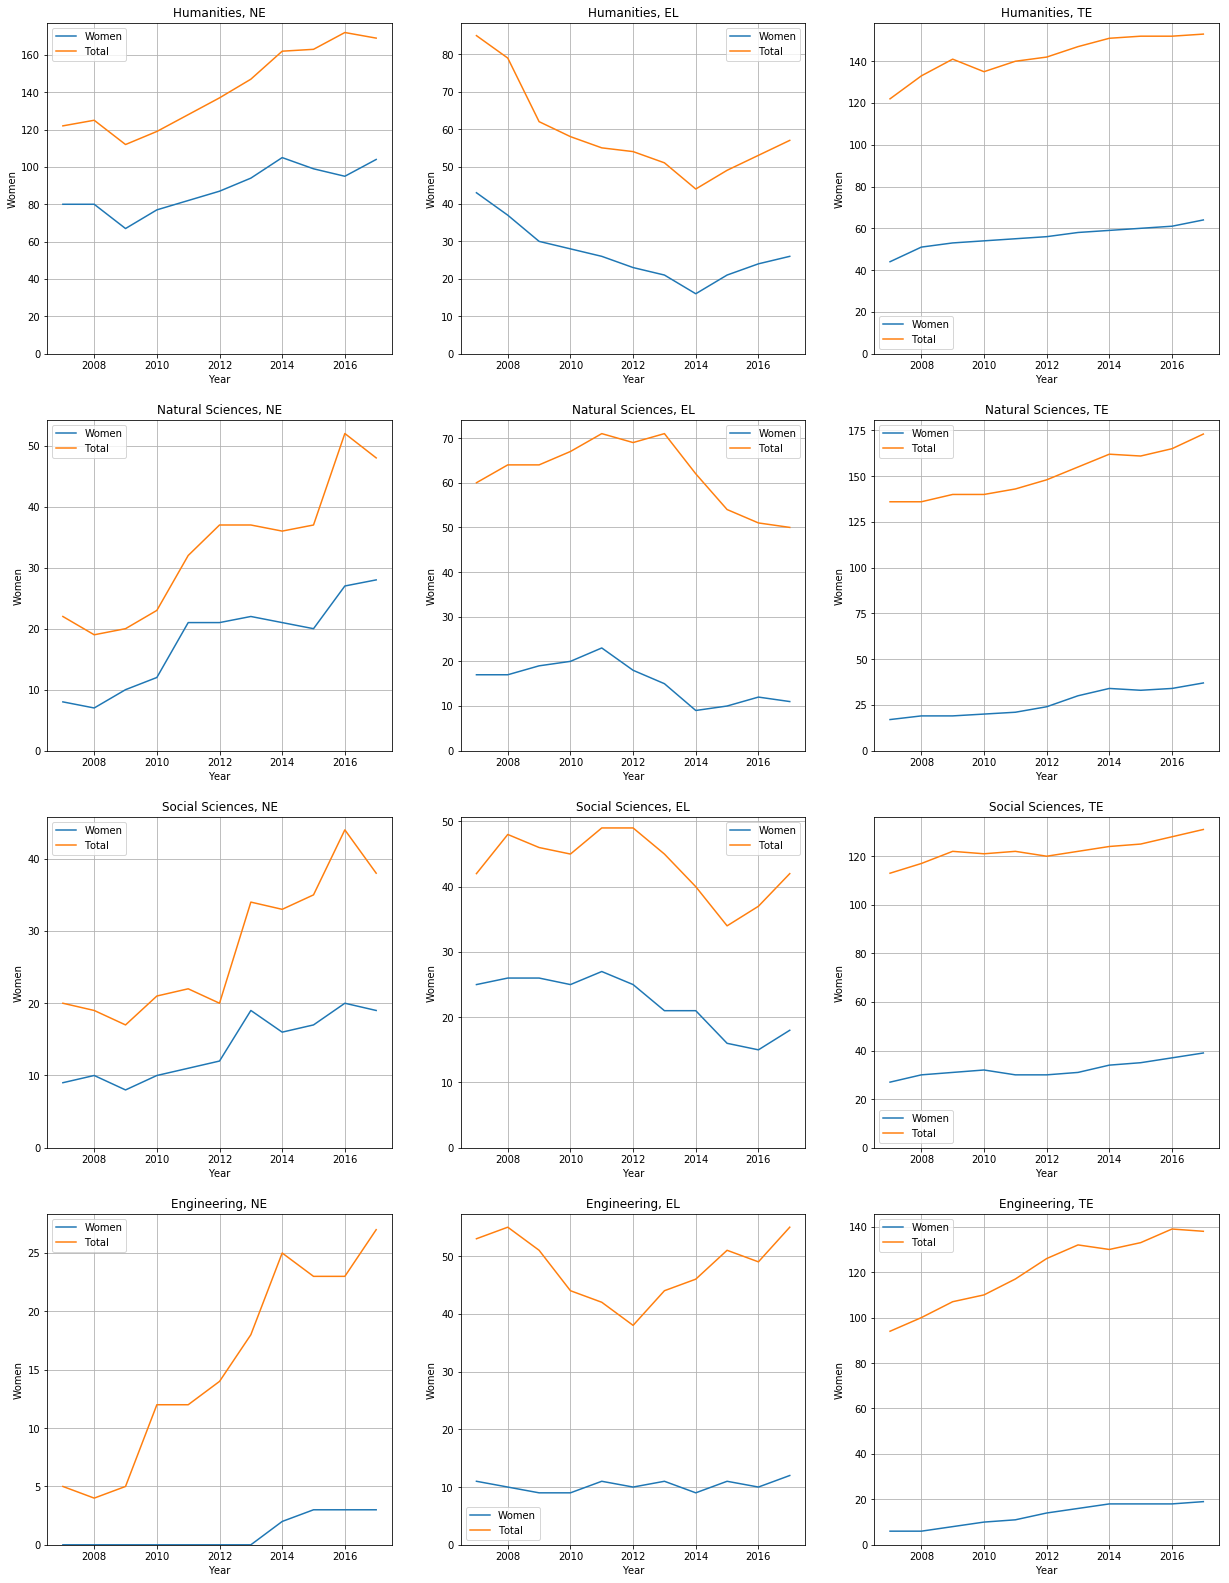

In [17]:
fig, ax = plt.subplots(4, 3, figsize=(21, 28))

for i in range(12):
    lineGraph(ax[i//3, i%3], i // 3, i % 3, abbrev=True)

The three graphs for each academic division look like stairs stepping down. The NE and TE of each division would be good for you-draw-it's. Let's export this data.

In [6]:
M = {}
for i in range(12):
    div = allDivisions[i // 3]
    status = allStatuses[i % 3]
    name = '{}-{}'.format(div, status)
    df = dfs[name]
    M[name] = list(df.T.to_dict().values())
print(json.dumps(M))

{"HUM-NE": [{"Year": 2007.0, "% Women": 0.6557, "Women": 80.0, "% Men": 0.3443, "Men": 42.0, "Total": 122.0}, {"Year": 2008.0, "% Women": 0.64, "Women": 80.0, "% Men": 0.36, "Men": 45.0, "Total": 125.0}, {"Year": 2009.0, "% Women": 0.5982, "Women": 67.0, "% Men": 0.4018, "Men": 45.0, "Total": 112.0}, {"Year": 2010.0, "% Women": 0.6471, "Women": 77.0, "% Men": 0.3529, "Men": 42.0, "Total": 119.0}, {"Year": 2011.0, "% Women": 0.6406, "Women": 82.0, "% Men": 0.3594, "Men": 46.0, "Total": 128.0}, {"Year": 2012.0, "% Women": 0.635, "Women": 87.0, "% Men": 0.365, "Men": 50.0, "Total": 137.0}, {"Year": 2013.0, "% Women": 0.6395, "Women": 94.0, "% Men": 0.3605, "Men": 53.0, "Total": 147.0}, {"Year": 2014.0, "% Women": 0.6481, "Women": 105.0, "% Men": 0.3519, "Men": 57.0, "Total": 162.0}, {"Year": 2015.0, "% Women": 0.6074, "Women": 99.0, "% Men": 0.3926, "Men": 64.0, "Total": 163.0}, {"Year": 2016.0, "% Women": 0.5523, "Women": 95.0, "% Men": 0.4477, "Men": 77.0, "Total": 172.0}, {"Year": 2017

**(Side note: The preview gif of the article should be the three graphs (HUM, NAT, SOC), side by side, stepping down as academic status is increased.)**